In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import matplotlib.pyplot as plt

In [2]:
import tflearn
from tflearn.layers.conv import conv_2d , max_pool_2d
from tflearn.layers.core import input_data , dropout , fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
train_cats = r'dataset\train\cats'
train_dogs = r'dataset\train\dogs'
test_cats = r'dataset\valid\cats'
test_dogs = r'dataset\valid\dogs'
img_size = 50
lr = 1e-3
model_name = 'dogs-vs-cat-convnet'

In [ ]:
def create_label(image_name):
    if image_name == 'cats':
        return np.array([1,0])
    elif image_name == 'dogs':
        return np.array([0,1])

In [ ]:
# train_count = 0

# def create_train_data():
#     global train_count
#     training_data = []
#     for img in tqdm(os.listdir(train_cats)):
#         path = os.path.join(train_cats , img)
#         img_data = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
#         if (type(img_data)==type(None)):
#             pass
#         else:
#             img_data = cv2.resize(img_data , (img_size , img_size))
#             training_data.append([np.array(img_data) , create_label('cats')])
#             train_count += 1
#     for img in tqdm(os.listdir(train_dogs)):
#         path = os.path.join(train_dogs , img)
#         img_data = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
#         if (type(img_data)==type(None)):
#             pass
#         else:
#             img_data = cv2.resize(img_data , (img_size , img_size))
#             training_data.append([np.array(img_data) , create_label('dogs')])
#             train_count += 1
#     shuffle(training_data)
#     np.save(r'dataset\training_data\cvd_train_data.npy' , training_data)
#     print(train_count)
#     return training_data

In [ ]:
# def create_test_data():
#     testing_data = []
#     for img in tqdm(os.listdir(test_cats)):
#         path = os.path.join(test_cats , img)
#         img_data = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
#         if (type(img_data)==type(None)):
#             pass
#         else:
#             img_data = cv2.resize(img_data , (img_size , img_size))
#             testing_data.append([np.array(img_data) , create_label('cats')])
#     for img in tqdm(os.listdir(test_dogs)):
#         path = os.path.join(test_dogs , img)
#         img_data = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
#         if (type(img_data)==type(None)):
#             pass
#         else:
#             img_data = cv2.resize(img_data , (img_size , img_size))
#             testing_data.append([np.array(img_data) , create_label('dogs')])
#     shuffle(testing_data)
#     np.save(r'dataset\testing_data\cvd_test_data.npy' , testing_data)
#     return testing_data

In [ ]:
# train_data = create_train_data()

In [ ]:
# len(train_data)

In [ ]:
# test_data = create_test_data()

### Loading npy images

In [7]:
train_data = np.load(r'dataset\training_data\cvd_train_data.npy' , allow_pickle = True)
test_data = np.load(r'dataset\testing_data\cvd_test_data.npy' , allow_pickle = True)

In [8]:
train = train_data[:-500]
test = train_data[-500:]

In [9]:
X_Train = np.array([i[0] for i in train]).reshape(-1,img_size , img_size , 1)
Y_Train = [i[1] for i in train]
X_Test = np.array([i[0] for i in test]).reshape(-1,img_size , img_size , 1)
Y_Test = [i[1] for i in test]

In [10]:
tfc.reset_default_graph()

In [11]:
convnet = input_data(shape = [None , img_size , img_size , 1] , name = 'input')
convnet = conv_2d(convnet , 32 , 5 , activation = 'relu') 
convnet = max_pool_2d(convnet , 5)
convnet = conv_2d(convnet , 64 , 5 , activation = 'relu') 
convnet = max_pool_2d(convnet , 5)
convnet = conv_2d(convnet , 128 , 5 , activation = 'relu') 
convnet = max_pool_2d(convnet , 5)
convnet = conv_2d(convnet , 64 , 5 , activation = 'relu') 
convnet = max_pool_2d(convnet , 5)
convnet = conv_2d(convnet , 32 , 5 , activation = 'relu') 
convnet = max_pool_2d(convnet , 5)
convnet = fully_connected(convnet , 1024 , activation = 'relu') 
convnet = dropout(convnet , 0.8)
convnet = fully_connected(convnet , 2 , activation = 'softmax') 
convnet = regression(convnet , optimizer = 'adam' , learning_rate = lr , loss = 'categorical_crossentropy' , name = 'output')
model = tflearn.DNN(convnet ,
        tensorboard_dir = r'LOG_catvdog_tensorflow',
                   tensorboard_verbose = 0)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.fit(X_inputs=X_Train , Y_targets=Y_Train , n_epoch = 10, validation_set = (X_Test ,Y_Test),
         snapshot_step = 500 , show_metric = True , run_id = model_name)

Training Step: 3049  | total loss: 0.40001 | time: 20.475s
| Adam | epoch: 010 | loss: 0.40001 - acc: 0.8271 -- iter: 19456/19457
Training Step: 3050  | total loss: 0.39258 | time: 21.558s
| Adam | epoch: 010 | loss: 0.39258 - acc: 0.8303 | val_loss: 0.46311 - val_acc: 0.7960 -- iter: 19457/19457
--


In [27]:
model.predict([test_data[1][0].reshape(img_size , img_size , 1)])[0]

array([0.94632405, 0.05367601], dtype=float32)

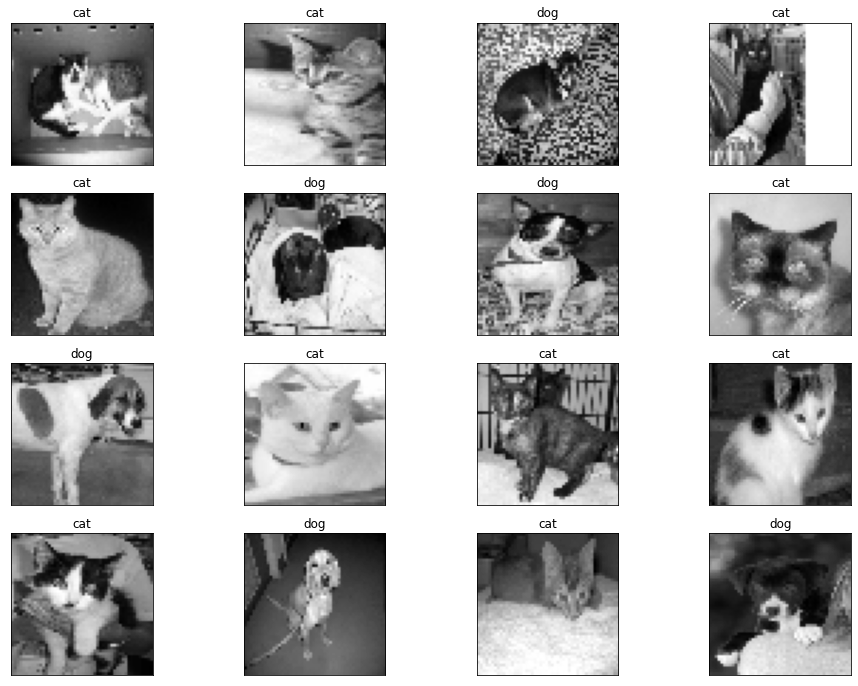

In [29]:
fig = plt.figure(figsize = (16 , 12))

for num , data in enumerate(test_data[:16]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot( 4, 4 , num+1)
    orig = img_data
    data = img_data.reshape(img_size , img_size , 1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1:
        str_label = 'dog'
    else:
        str_label = 'cat'
        
    y.imshow(orig , cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)    
plt.show()

In [1]:
%load_ext tensorboard

In [3]:
%tensorboard --logdir r'LOG_catvdog_tensorflow'

Reusing TensorBoard on port 6006 (pid 17768), started 0:01:50 ago. (Use '!kill 17768' to kill it.)